In [1]:
########## IMPORT LIBRARIES ###########
import pandas as pd # For data pre-processing and model developement
import os # for input output operation 
import numpy as np # for linear algebric functions and numerical operations with python
import matplotlib.pyplot as plt # for visualization and plttoing
import seaborn as sns # for plotting 
from scipy import stats # for statistical operation
from scipy.stats import chi2_contingency # For chi-square test
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
# set working directory
os.chdir("D:\edwiser\Project")

In [3]:
# check working directory
os.getcwd()

'D:\\edwiser\\Project'

In [4]:
#Import data
df_day= pd.read_csv("day.csv")

In [5]:
#print the data
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
########################################### Exploratory data Analysis ##############################################
# The number of rows and columns present in the data frame
df_day.shape 

(731, 16)

In [7]:
#here we have 731 observations and 16 variables
# out of 16 variables 15 are independent and one is dependent variable
df_day.info() # Description of variables in the data set 'df_day'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null int64
yr            731 non-null int64
mnth          731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
# In the dataset the catagorical variavles are in integer format so we will convert it into factor numeric
df_day['season']= df_day['season'].astype('object')
df_day['yr']=df_day['yr'].astype('object')
df_day['mnth']=df_day['mnth'].astype('object')
df_day['holiday']=df_day['holiday'].astype('object')
df_day['workingday']=df_day['workingday'].astype('object')
df_day['weekday']=df_day['weekday'].astype('object')
df_day['weathersit']=df_day['weathersit'].astype('object')

In [9]:
# extracting date of the month from the dteday
# We saw that hthe ariable 'dteday' is in object format so we have to convert the dteday into propor datetime format
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
# Extracting day
df_day['dteday'] = df_day.dteday.dt.day
df_day['dteday'] = df_day['dteday'].astype('object')

In [10]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
# Description of variables in the data set 'df_day' after type conversion
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
instant       731 non-null int64
dteday        731 non-null object
season        731 non-null object
yr            731 non-null object
mnth          731 non-null object
holiday       731 non-null object
weekday       731 non-null object
workingday    731 non-null object
weathersit    731 non-null object
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
dtypes: float64(4), int64(4), object(8)
memory usage: 91.5+ KB


In [12]:
# In the data set we can see that the target variable 'cnt' is the sum of the variables 'casual' and 'registered'
# since we have to predict the total count which is 'cnt', we can remove the 'casual' and 'registered' from the data set 'df_day'
# we can remove 'instant' which is nothing but a index/serial number
# In the attributes 'holiday' and 'workingday', we can say that holiday is a subset of workingday because if it is  a holiday,
# then it is not workingday and vice-versa. so we can remove holiday from the dataset.

# Removing variables ['casual','registered','instant','holiday'] from the data set day.
df_day = df_day.drop(['casual','registered','instant','holiday'], axis=1)

In [13]:
df_day.columns

Index(['dteday', 'season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [14]:
# Now we have the numerical variables['temp','atemp','hum','windspeed','cnt'] and the rest are catagorical

In [14]:
                  ######Distribution and behaviour of variables#######
# Summary of the target variable cnt
df_day['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

Text(0.5, 0.98, 'Distribution of cnt')

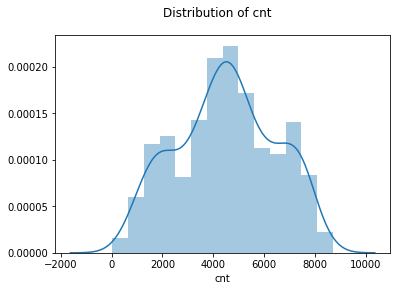

In [15]:
# normality of cnt
sns.distplot(df_day['cnt'])
plt.suptitle("Distribution of cnt")

In [16]:
skewness = df_day['cnt'].skew()
kurtosis = df_day['cnt'].kurt()
print('skewness =',skewness,'kurtosis=', kurtosis)

skewness = -0.04735278011900183 kurtosis= -0.8119223847191548


In [17]:
#From the skewness we can see that cnt is negatively skewed

Text(0.5, 0.98, 'Distribution of temp')

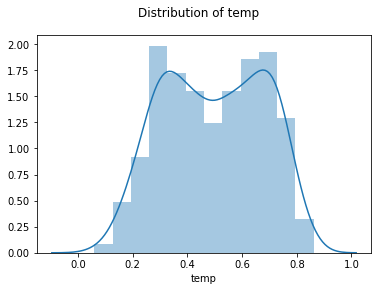

In [18]:
#check the normality of the numerical independet variables['temp', 'atemp', 'hum', 'windspeed']
sns.distplot(df_day['temp'])
plt.suptitle("Distribution of temp")

In [19]:
skewness = df_day['temp'].skew()
kurtosis = df_day['temp'].kurt()
print('skewness =',skewness,'kurtosis=', kurtosis)

skewness = -0.054520964760408255 kurtosis= -1.1188641545735662


In [20]:
# temp is also negatively skewed since skewness is less that zero

Text(0.5, 0.98, 'Distribution of atemp')

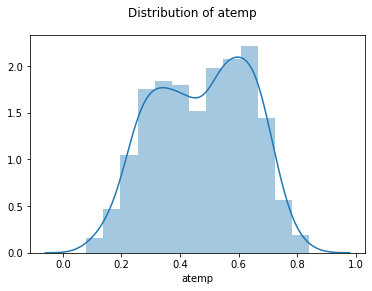

In [21]:
sns.distplot(df_day['atemp'])
plt.suptitle("Distribution of atemp")

In [22]:
skewness = df_day['atemp'].skew()
kurtosis = df_day['atemp'].kurt()
print('skewness =',skewness,'kurtosis=', kurtosis)

skewness = -0.13108804205446004 kurtosis= -0.9851305305195086


Text(0.5, 0.98, 'Distribution of hum')

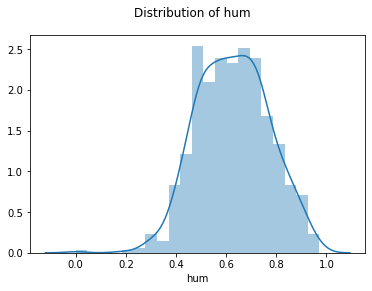

In [23]:
sns.distplot(df_day['hum'])
plt.suptitle("Distribution of hum")

In [24]:
skewness = df_day['hum'].skew()
kurtosis = df_day['hum'].kurt()
print('skewness =',skewness,'kurtosis=', kurtosis)

skewness = -0.0697834339909521 kurtosis= -0.06453013469388669


Text(0.5, 0.98, 'Distribution of windspeed')

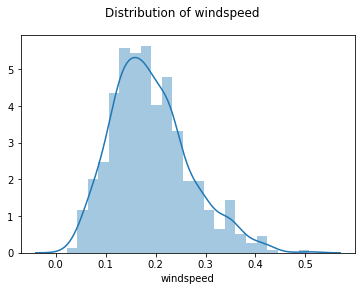

In [25]:
sns.distplot(df_day['windspeed'])
plt.suptitle("Distribution of windspeed")

In [26]:
skewness = df_day['windspeed'].skew()
kurtosis = df_day['windspeed'].kurt()
print('skewness =',skewness,'kurtosis=', kurtosis)

skewness = 0.6773454211095377 kurtosis= 0.4109222677315345


In [28]:
# windspeed is positively skewed since skewness is >0

In [29]:
#from the above plots we saw that all the numerical variables except windspeed is negatively skewed.
# it seems that outliers are present in these variables.
# we will remove that outliers in outlier analysis step.

Text(0, 0.5, 'Count')

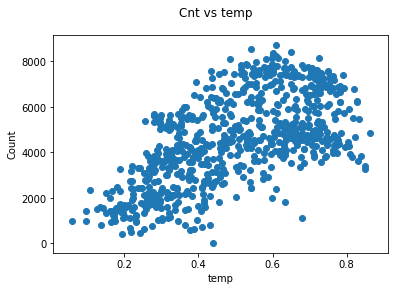

In [27]:
###########Relation between numerical variables and target variable 'cnt' ####################
# now we will check the relationship between numerical(idependent) and target variable 'cnt' through scatter plot
#Relation between 'temp' and 'cnt'
plt.scatter(df_day['temp'], df_day['cnt'])
plt.suptitle('Cnt vs temp')
plt.xlabel('temp')
plt.ylabel('Count')

Text(0, 0.5, 'count')

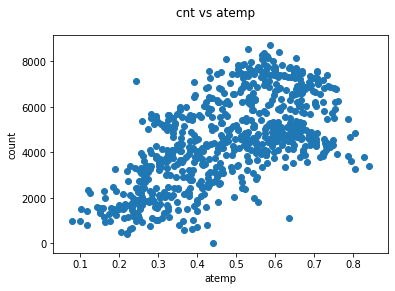

In [28]:
#Relation between 'atemp' and 'cnt'
plt.scatter(df_day['atemp'],df_day['cnt'])
plt.suptitle('cnt vs atemp')
plt.xlabel('atemp')
plt.ylabel('count')

Text(0, 0.5, 'count')

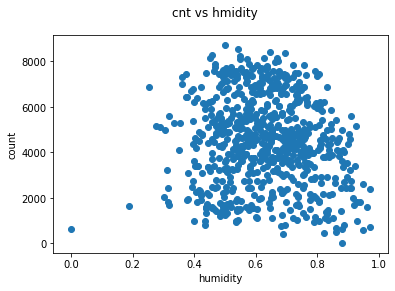

In [29]:
#Relation between 'hum' and 'cnt'
plt.scatter(df_day['hum'],df_day['cnt'])
plt.suptitle('cnt vs hmidity')
plt.xlabel('humidity')
plt.ylabel('count')

Text(0, 0.5, 'count')

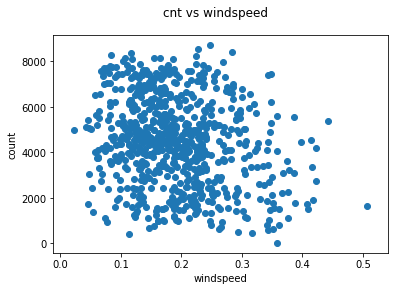

In [30]:
#Relation between 'windspeed' and 'cnt'
plt.scatter(df_day['windspeed'],df_day['cnt'])
plt.suptitle('cnt vs windspeed')
plt.xlabel('windspeed')
plt.ylabel('count')

[Text(0, 0, 'spring'),
 Text(0, 0, 'sumer'),
 Text(0, 0, 'fall'),
 Text(0, 0, 'winter')]

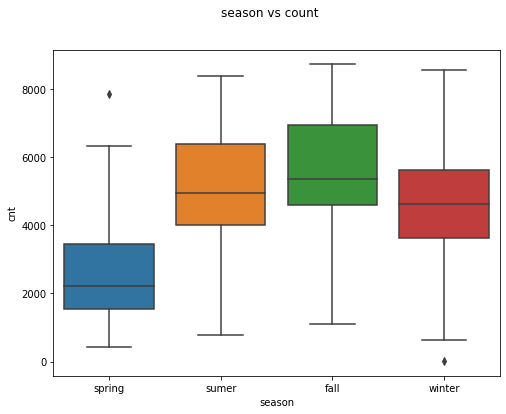

In [31]:
# now we will check the relationship between catagorical variables and the dependent varible cnt
# Relationship between season and cnt
data = pd.concat([df_day['cnt'], df_day['season']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x= 'season', y="cnt", data=data)
plt.suptitle('season vs count')
ax.set_xticklabels(['spring','sumer','fall','winter'])

[Text(0, 0, '0: holiday'), Text(0, 0, '1: workingday')]

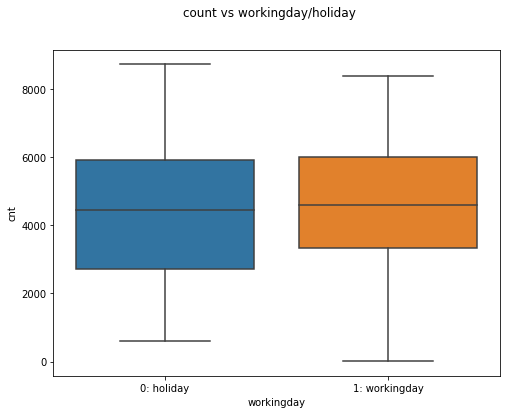

In [32]:
# Relation between count vs workingday/holiday
data = pd.concat([df_day['workingday'],df_day['cnt']], axis =1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x='workingday', y= 'cnt', data= data)
plt.suptitle('count vs workingday/holiday')
ax.set_xticklabels(['0: holiday','1: workingday'])

[Text(0, 0, '1: Clear'), Text(0, 0, '2: Mist'), Text(0, 0, '3: Light Snow')]

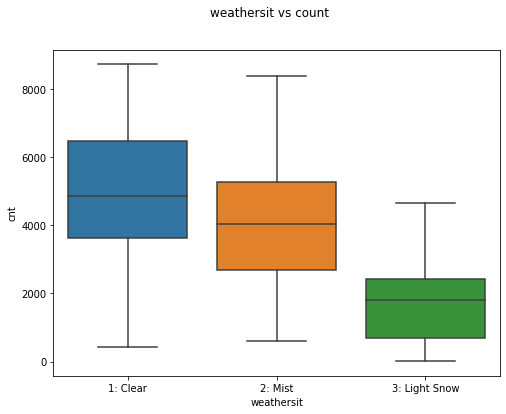

In [33]:
# relation between weathersit and count
data = pd.concat([df_day['cnt'],df_day['weathersit']], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x= 'weathersit', y= 'cnt', data = data)
plt.suptitle('weathersit vs count')
ax.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

[Text(0, 0, '0:sunday'),
 Text(0, 0, '1:monday'),
 Text(0, 0, 'tuesday'),
 Text(0, 0, '3:wednesday'),
 Text(0, 0, '4:thursday'),
 Text(0, 0, '5:friday'),
 Text(0, 0, '6:saturday')]

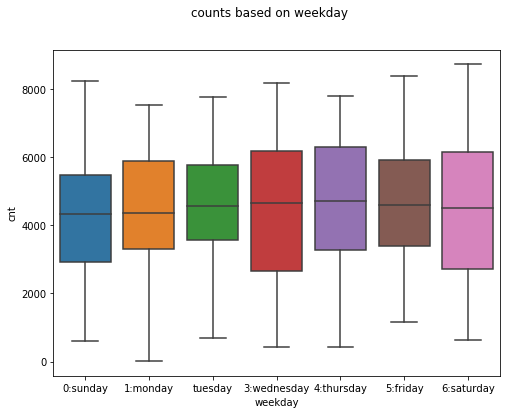

In [34]:
#counts of bike rental based on weekdays
data = pd.concat([df_day['cnt'],df_day['weekday']], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig= sns.boxplot(x= 'weekday', y= 'cnt', data = data)
plt.suptitle('counts based on weekday')
ax.set_xticklabels(['0:sunday','1:monday','tuesday','3:wednesday','4:thursday','5:friday','6:saturday'])

[Text(0, 0, '0:2011'), Text(0, 0, '1:2012')]

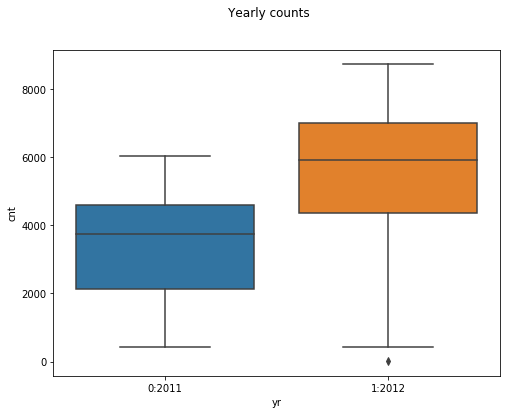

In [35]:
# Yearly counts of bike rental 
data = pd.concat([df_day['cnt'],df_day['yr']], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig= sns.boxplot(x= 'yr', y= 'cnt', data = data)
plt.suptitle('Yearly counts')
ax.set_xticklabels(['0:2011','1:2012'])

[Text(0, 0, '1:jan'),
 Text(0, 0, '2:feb'),
 Text(0, 0, '3:mar'),
 Text(0, 0, '4:april'),
 Text(0, 0, '5:may'),
 Text(0, 0, '6:june'),
 Text(0, 0, '7:july'),
 Text(0, 0, '8:aug'),
 Text(0, 0, '9:sept'),
 Text(0, 0, '10:oct'),
 Text(0, 0, '11:nov'),
 Text(0, 0, '12:dec')]

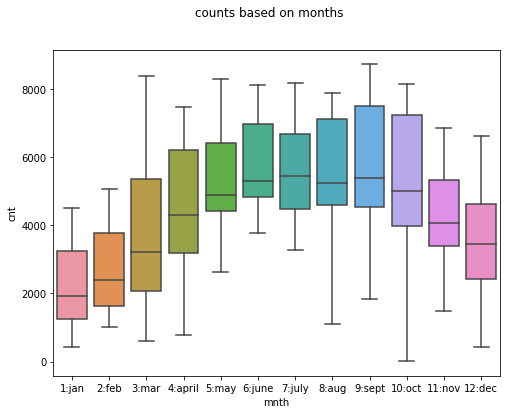

In [36]:
#counts based on months 
data = pd.concat([df_day['cnt'],df_day['mnth']], axis = 1)
f, ax = plt.subplots(figsize = (8,6))
fig= sns.boxplot(x= 'mnth', y= 'cnt', data = data)
plt.suptitle('counts based on months')
ax.set_xticklabels(['1:jan','2:feb','3:mar','4:april','5:may','6:june','7:july','8:aug','9:sept','10:oct','11:nov','12:dec'])

In [37]:
################################# Missing Value Analysis #########################################
miss_val = pd.DataFrame(df_day.isnull().sum())
miss_val = (miss_val/len(df_day))*100
miss_val.reset_index()
miss_val = miss_val.rename(columns= {'index':'variables', 0:'missing percentage'})

In [38]:
miss_val

,missing percentage
dteday,0.0
season,0.0
yr,0.0
mnth,0.0
weekday,0.0
workingday,0.0
weathersit,0.0
temp,0.0
atemp,0.0
hum,0.0


In [42]:
# There is no missing value in the dataset df_day. so we don't need to impute or remove any value

Text(0.5, 0.98, 'cnt')

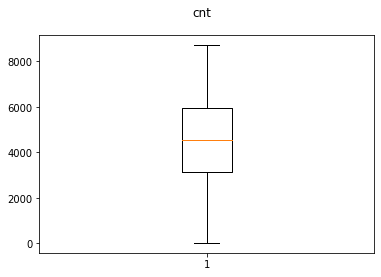

In [39]:
######################################## Outlier Analysis ########################################################
# Now we will check for outliers in the numerical variables by ploting boxplot
# boxplot for cnt 
plt.boxplot(df_day['cnt'])
plt.suptitle("cnt")

Text(0.5, 0.98, 'temp')

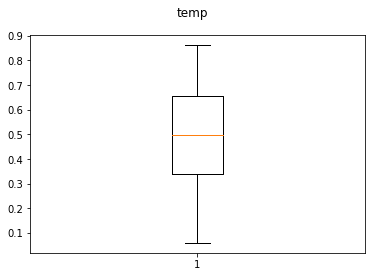

In [40]:

# boxplot for temp variable 
plt.boxplot(df_day['temp'])
plt.suptitle("temp")

Text(0.5, 0.98, 'atemp')

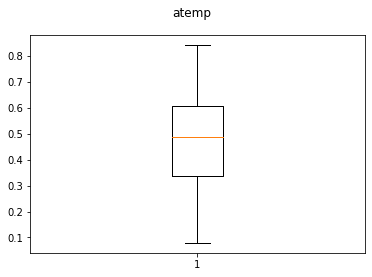

In [41]:
# Boxplot for atemp variable
plt.boxplot(df_day['atemp'])
plt.suptitle('atemp')

Text(0.5, 0.98, 'hum')

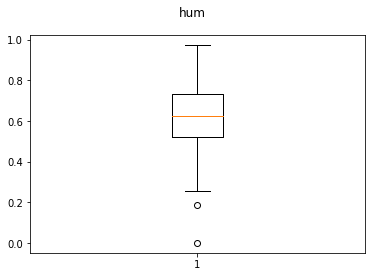

In [42]:
#boxplot for hum
plt.boxplot(df_day['hum'])
plt.suptitle('hum')

Text(0.5, 0.98, 'windspeed')

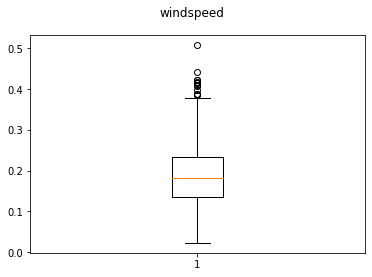

In [43]:
# boxplot for windspeed
plt.boxplot(df_day['windspeed'])
plt.suptitle('windspeed')

In [44]:
# Above plots shows that there are some negatve outliers present in humidiy and positive outliers in windspeed
# we'll detect and remove the outliers frome these variables.
cnames = ['temp','atemp','hum','windspeed']
for i in cnames:
    print(i)
    q75,q25 = np.percentile(df_day.loc[:,i],[75,25])
    iqr = q75-q25 
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)

temp
-0.14041600000000015
1.1329160000000003
atemp
-0.06829675000000018
1.0147412500000002
hum
0.20468725
1.0455212500000002
windspeed
-0.012446750000000034
0.38061125


In [45]:
# drop those observations wich are less than lower fence and greater than upper fence
df_day = df_day.drop(df_day[df_day.loc[:,i] < min].index)
df_day = df_day.drop(df_day[df_day.loc[:,i] > max].index)

In [46]:
df_day.shape

(718, 12)

Text(0.5, 0.98, 'hum')

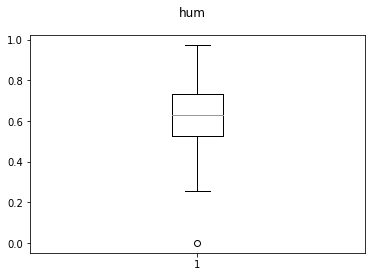

In [47]:
# after removing outliers now we have 718 observations
# boxplots after removing outliers
# plot for hum variable
plt.boxplot(df_day['hum'])
plt.suptitle('hum')

Text(0.5, 0.98, 'windspeed')

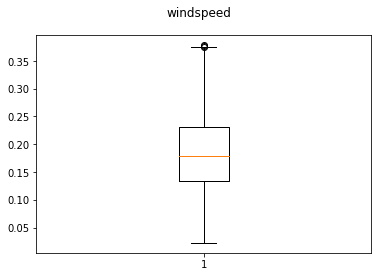

In [48]:
# plot for windspeed 
plt.boxplot(df_day['windspeed'])
plt.suptitle('windspeed')

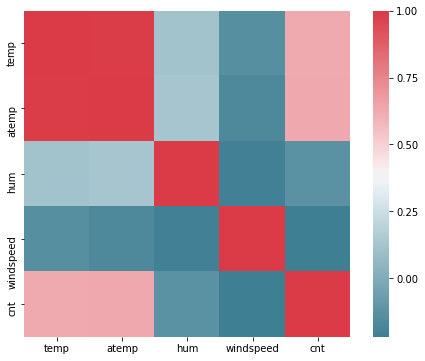

In [49]:
################# FEATURE SELECTION ###############
# Already we hahve removed some features which are not providing much information.
# Now we will select/remove the rest feature based on their importance.
# selection of numerical features based on correlation plot
# heatmap or correlation plot
f, ax = plt.subplots(figsize=(8,6))

#Generate correlation matrix
corr_mat = df_day.corr()
#Plot using seaborn library
sns.heatmap(corr_mat, mask=np.zeros_like(corr_mat, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)


In [50]:
# There is  high correlation between temp and atemp so we can remove one of them from the data set
# we will remove atemp from the data set
day_fet = df_day.drop(['atemp'],axis =1)

In [51]:
# selecion of catagorical Features
# chi-square test of independence
#cat_names = ["season","day","mnth","weekday","workingday","weathersit"]
#for i in cat_names:
 #   print(i)
  #  chi2, p , dof, ex = chi2_contingency(pd.crosstab(df_day['cnt'],df_day[i]))
   # print(p)

In [52]:
# Since our target variable is a numerical variable, we cant use 'cnt' with catagorical variable for chi_square test.

In [53]:
day_fet.columns
#day_fet.shape

Index(['dteday', 'season', 'yr', 'mnth', 'weekday', 'workingday', 'weathersit',
       'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [54]:
# After selecting relevent features we have 11 features one is the target variable and rest are independent variables

In [55]:
############## Feature scalling #############
# All features are already given in normalised form so we need not to perform feature scaling

In [56]:
############## MODEL DEVELOPEMENT #######################
# before developing model we need to split the train and test data
from sklearn.model_selection import train_test_split
train, test = train_test_split(day_fet, test_size = 0.25)

In [57]:
train.shape

(538, 11)

In [58]:
###########Decision tree regession(C50)###########
#importing library for decision tree regression
from sklearn.tree import DecisionTreeRegressor 
fit_DT = DecisionTreeRegressor(max_depth = 10).fit(train.iloc[:,0:10],train.iloc[:,10])
print(fit_DT)
# Apply model on test data
prediction_DT = fit_DT.predict(test.iloc[:,0:10])
#print(prediction_DT)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


In [60]:
#calculating MAPE for decision tree regression
#defining MAPE function
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape
#MAPE for decision tree regression
MAPE(test.iloc[:,10], prediction_DT)

In [61]:
# Error is 18.441166136150585

In [62]:
### Calculation of RMSE - root mean square error for DT_Regression
#RSS - Residual Sum 
RSS= ((test.iloc[:,10]-prediction_DT)**2).sum()
print(RSS)

MSE = np.mean((test.iloc[:,10]-prediction_DT)**2)
print(MSE)

#RMSE
RMSE=np.sqrt(MSE)
print(RMSE)

158739986.98777837
881888.816598769
939.0893549597764


In [63]:
################################Random forest ###########################3
model_RF = RandomForestRegressor(n_estimators = 500).fit(train.iloc[:,0:10], train.iloc[:,10])
RF_Predictions = model_RF.predict(test.iloc[:,0:10])

In [64]:
# Mape for Random forest
MAPE(test.iloc[:,10],RF_Predictions)

13.91582452920711

In [65]:
### Calculatio of RMSE - root mean square error for Random Forest
#RSS - Residual Sum 
RSS= ((test.iloc[:,10]-RF_Predictions)**2).sum()
print(RSS)

MSE = np.mean((test.iloc[:,10]-RF_Predictions)**2)
print(MSE)

#RMSE
RMSE=np.sqrt(MSE)
print(RMSE)

79893491.043304
443852.7280183552
666.2227315383011


In [66]:
############# Linear Regression ############
#import  linear regreesion  
import statsmodels.api as sm

linear_reg = sm.OLS(train.iloc[:,10],(train.iloc[:,0:10]).astype(float)).fit()

#Summary of model
linear_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1511.
Date:                Mon, 21 Oct 2019   Prob (F-statistic):                        0.00
Time:                        16:33:33   Log-Likelihood:                         -4425.1
No. Observations:                 538   AIC:                                      8870.
Df Residuals:                     528   BIC:                                      8913.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
dteday        -3.4582      4.361     -0.793      0.428     -12.025       5.108
season       589.5715     64.721      9.109      0.000     462.429     716.714
yr          2147.8017     78.136     27.488      0.000    1994.307    2301.296
mnth         -47.0441     20.550     -2.289      0.022     -87.414      -6.674
weekday       97.9052     19.385      5.051      0.000      59.825     135.986
workingday   220.5790     83.575      2.639      0.009      56.398     384.760
weathersit  -759.6093     92.659     -8.198      0.000    -941.636    -577.583
temp        5339.5336    226.692     23.554      0.000    4894.205    5784.862
hum          602.1418    307.547      1.958      0.051      -2.023    1206.307
windspeed   -599.9124    472.291     -1.270      0.205   -1527.713     327.888
==============================================================================
Omnibus:                       67.938   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.527
Skew:                          -0.753   Prob(JB):                     3.35e-28
Kurtosis:                       4.837   Cond. No.                         234.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Predict the model
predict_LR = linear_reg.predict(test.iloc[:,0:10])
#print(predict_LR)

In [69]:
#Evaluation of LR model using MAPE
MAPE(test.iloc[:,10],predict_LR)

In [72]:
### Calculatio of RMSE - root mean square error for Linear Regression
#RSS - Residual Sum 
RSS= ((test.iloc[:,10]-predict_LR)**2).sum()
print(RSS)

MSE = np.mean((test.iloc[:,10]-predict_LR)**2)
print(MSE)

#RMSE
RMSE=np.sqrt(MSE)
print(RMSE)

134855552.31580314
749197.512865573
865.5619636199208


In [ ]:
#conclusion 
# Random Forest is the best model for the dataset.